In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])
sales1=pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
sales1 = sales1.sort(['sqft_living','price'])
sales2=pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
sales2 = sales2.sort(['sqft_living','price'])
sales3=pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
sales3 = sales3.sort(['sqft_living','price'])
sales4=pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
sales4 = sales4.sort(['sqft_living','price'])
salesv=pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
salesv = salesv.sort(['sqft_living','price'])
salest=pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
salest = salest.sort(['sqft_living','price'])

/Users/junjieyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/junjieyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/junjieyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/junjieyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/junjieyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/junjieyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/junjieyang/anaconda/

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature.apply(lambda x : x**power)
    return poly_dataframe

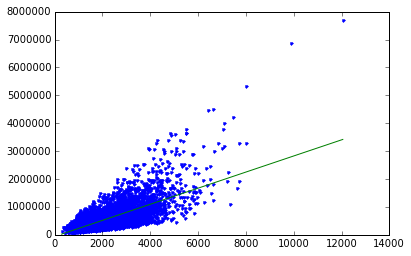

In [5]:
poly1_data=polynomial_dataframe(sales['sqft_living'],1)
poly1_data['price']=sales['price']
poly1_data.head()
lm1=LinearRegression()
column1=['power_1']
x=poly1_data[column1]
y=poly1_data[['price']]
lm1.fit(x,y)
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',poly1_data['power_1'],lm1.predict(x),'-')

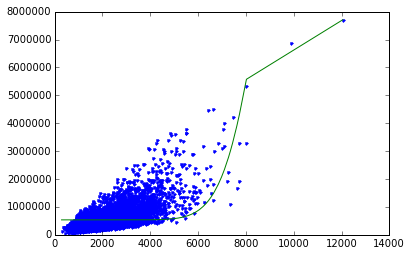

In [6]:
poly15_data=polynomial_dataframe(sales['sqft_living'],15)
poly15_data['price']=sales['price']
poly15_data.head()
lm2=LinearRegression()
column2=[]
for i in range(1,16):
    column2.append('power_'+str(i))
x=poly15_data[column2]
y=poly15_data[['price']]
lm2.fit(x,y)
lm2.coef_
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',poly1_data['power_1'],lm2.predict(x),'-')

In [7]:
poly15_data1=polynomial_dataframe(sales1['sqft_living'],15)
poly15_data1['price']=sales1['price']
poly15_data2=polynomial_dataframe(sales2['sqft_living'],15)
poly15_data2['price']=sales2['price']
poly15_data3=polynomial_dataframe(sales3['sqft_living'],15)
poly15_data3['price']=sales3['price']
poly15_data4=polynomial_dataframe(sales4['sqft_living'],15)
poly15_data4['price']=sales4['price']
po1=LinearRegression()
po2=LinearRegression()
po3=LinearRegression()
po4=LinearRegression()
x1=poly15_data1[column2]
x2=poly15_data2[column2]
x3=poly15_data3[column2]
x4=poly15_data4[column2]
y1=poly15_data1[['price']]
y2=poly15_data2[['price']]
y3=poly15_data3[['price']]
y4=poly15_data4[['price']]

In [8]:
po1.fit(x1,y1)
po2.fit(x2,y2)
po3.fit(x3,y3)
po4.fit(x4,y4)
a=[po1,po2,po3,po4]
for i in a:
    print i.coef_

[[  3.05794168e-90   2.99618703e-49  -1.41375298e-55   1.32189664e-59
    2.73286787e-74   1.10358334e-70   8.37724029e-67   6.23411957e-63
    4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
    3.62176959e-44  -5.63501661e-48   2.18641116e-52]]
[[  2.71335933e-77   7.33543671e-39   8.99952909e-45  -2.42246376e-49
    2.34153792e-53  -3.78400489e-57   3.64549518e-55   1.50416248e-51
    5.76015630e-48   1.95770486e-44   5.39396508e-41   9.40376308e-38
   -3.63529121e-41   4.65476497e-45  -1.97197822e-49]]
[[  2.83751934e-88   5.40216168e-49   9.23441620e-55   2.60250861e-59
    1.90494147e-72   4.27894908e-69   2.68009626e-65   1.63911362e-61
    9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
    3.33756141e-43  -6.76238818e-47   3.43132932e-51]]
[[  1.37116044e-76   2.79607923e-40  -2.12796667e-44  -7.56195918e-50
    1.21487941e-53   9.03771653e-58   1.27070044e-54   4.87868964e-51
    1.73549019e-47   5.47058312e-44   1.39587597e-40   2.25041868

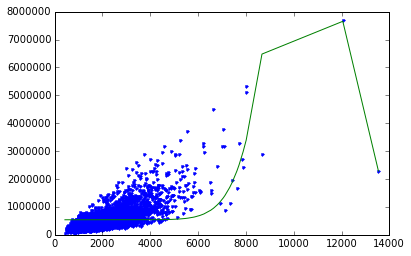

In [9]:
plt.plot(poly15_data1['power_1'],poly15_data1['price'],'.',poly15_data1['power_1'],po1.predict(x1),'-')

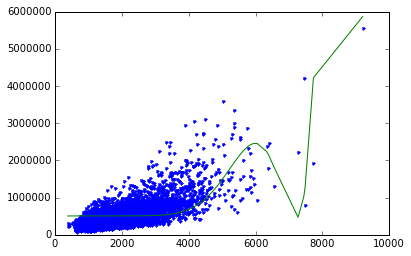

In [10]:
plt.plot(poly15_data2['power_1'],poly15_data2['price'],'.',poly15_data2['power_1'],po2.predict(x2),'-')

In [11]:
for i in range(1,16):
    pol=polynomial_dataframe(sales['sqft_living'],i)
    pol['price']=sales['price']
    x=pol.drop('price', axis=1)
    y=pol[['price']]
    lm=LinearRegression()
    lm.fit(x,y)
    polv=polynomial_dataframe(salesv['sqft_living'],i)
    polv['price']=salesv['price']
    xv=polv.drop('price', axis=1)
    rss=np.sum((polv[['price']]-lm.predict(xv))**2)
    print rss,i

price    6.290979e+14
dtype: float64 1
price    6.239551e+14
dtype: float64 2
price    6.258203e+14
dtype: float64 3
price    6.299873e+14
dtype: float64 4
price    6.282383e+14
dtype: float64 5
price    5.662686e+14
dtype: float64 6
price    1.073843e+15
dtype: float64 7
price    7.087837e+15
dtype: float64 8
price    4.530282e+16
dtype: float64 9
price    2.474228e+17
dtype: float64 10
price    1.194081e+18
dtype: float64 11
price    5.090600e+18
dtype: float64 12
price    7.616230e+17
dtype: float64 13
price    2.297561e+18
dtype: float64 14
price    6.955038e+18
dtype: float64 15


In [12]:
pol=polynomial_dataframe(sales['sqft_living'],6)
pol['price']=sales['price']
x=pol.drop('price', axis=1)
y=pol[['price']]
lm=LinearRegression()
lm.fit(x,y)
polt=polynomial_dataframe(salest['sqft_living'],6)
polt['price']=salest['price']
xt=polt.drop('price', axis=1)
rss=np.sum((polt[['price']]-lm.predict(xt))**2)
rss

price    1.352251e+14
dtype: float64